### Imports and Definitions

In [4]:
from glob import glob
from matplotlib import rcParams
from matplotlib.lines import Line2D
from os import makedirs
from seaborn import pointplot, set_context, set_style, violinplot
from treeswift import read_tree_newick
import matplotlib.pyplot as plt
FIGDIR = '../figs'; makedirs(FIGDIR, exist_ok=True)
set_context("paper", rc={"font.size":12,"axes.titlesize":16,"axes.labelsize":14,"legend.fontsize":10,"xtick.labelsize":10,"ytick.labelsize":10})
set_style("ticks")
rcParams['font.family'] = 'serif'
linestyle = {
    'coatran': '-',
    'VTS': '--',
}
color = {
    'coatran': 'blue',
    'VTS': 'red',
}
translate = {
    'coatran': 'CoaTran',
    'VTS': 'VirusTreeSimulator',
}

In [2]:
def get_real_time(fn):
    return float(open(fn).read().strip().splitlines()[0].strip().split(' ')[1])

### Execution Time vs. Number of Leaves

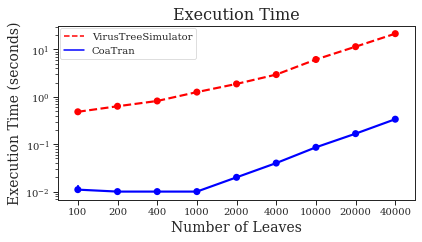

In [3]:
methods = ['VTS', 'coatran']
fig = plt.figure(figsize=(6.4,3.2))
for m in methods:
    x = list(); y = list()
    for n in sorted(int(d.split('/')[-1]) for d in glob('../simulations/*00')):
        for fn in glob('../simulations/%s/*/time.%s.txt' % (n,m)):
            x.append(n); y.append(get_real_time(fn))
    pointplot(x=x, y=y, color=color[m], linestyles=linestyle[m])
plt.yscale('log')
plt.title("Execution Time")
plt.xlabel("Number of Leaves")
plt.ylabel("Execution Time (seconds)")
handles = [Line2D([0],[0],color=color[m],label=translate[m],linestyle=linestyle[m],linewidth=1.5) for m in methods]
legend = plt.legend(handles=handles,bbox_to_anchor=(0.005,0.985), loc='upper left', borderaxespad=0., frameon=True)
fig.savefig('%s/runtime.pdf' % FIGDIR, format='pdf', bbox_inches='tight')

### Branch Length Distributions

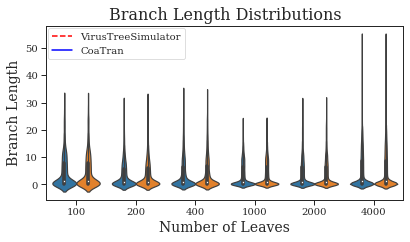

In [13]:
methods = ['VTS', 'coatran']
fig = plt.figure(figsize=(6.4,3.2))
x = list(); y = list(); h = list()
for m in methods:
    for n in sorted(int(d.split('/')[-1]) for d in glob('../simulations/*00')):
        for fn in glob('../simulations/%s/*/phylogeny.%s.*' % (n,m)):
            if 'detailed' in fn:
                continue
            if fn.endswith('.nwk'):
                tree = read_tree_newick(fn)
            else:
                tree = read_tree_newick(open(fn).read().splitlines()[-2].split('=')[-1])
            tree.suppress_unifurcations()
            bl = list(tree.branch_lengths()); x += [n]*len(bl); y += bl; h += [m]*len(bl)
violinplot(x=x, y=y, hue=h)
plt.title("Branch Length Distributions")
plt.xlabel("Number of Leaves")
plt.ylabel("Branch Length")
handles = [Line2D([0],[0],color=color[m],label=translate[m],linestyle=linestyle[m],linewidth=1.5) for m in methods]
legend = plt.legend(handles=handles,bbox_to_anchor=(0.005,0.985), loc='upper left', borderaxespad=0., frameon=True)
fig.savefig('%s/branchlengths.pdf' % FIGDIR, format='pdf', bbox_inches='tight')